In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew, shapiro #for some statistics
import statsmodels.api as sm

In [2]:
def plotting_3_chart(data):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    plt.ylabel('Probability Density', axes=ax1)
    ## plot the histogram. 
    sns.distplot(data, norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data, plot = ax2)


    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data, orient='v', ax = ax3 );
    plt.show()


In [3]:
raw_data=pd.read_csv('titanic.csv')

In [4]:
# 缺失值統計
for col in raw_data.columns:
    count=raw_data[raw_data[col].isnull()].shape[0]
    print(col,'nan_counts: ', count)

pclass nan_counts:  0
survived nan_counts:  0
name nan_counts:  0
sex nan_counts:  0
age nan_counts:  263
sibsp nan_counts:  0
parch nan_counts:  0
fare nan_counts:  1
embarked nan_counts:  2
home.dest nan_counts:  564


In [5]:
raw_data=raw_data.drop(columns='home.dest') #不分析home.dest

# 第二題

In [6]:
raw_data.sex.isnull().value_counts() #看性別缺失值

False    1309
Name: sex, dtype: int64

In [7]:
raw_data['surname']=raw_data['name'].map(lambda x:x.split(',')[0].strip()) # 將 surname 從 name 中分出來

In [8]:
raw_data[(raw_data.sex=='male')].surname.value_counts() # 全體男性姓氏統計

Sage        6
Asplund     6
Davies      6
Goodwin     5
Panula      5
           ..
Sawyer      1
Kassem      1
Payne       1
Denkoff     1
Kirkland    1
Name: surname, Length: 687, dtype: int64

In [9]:
f_d=raw_data[(raw_data.sex=='male') & (raw_data.survived==0)] # 死亡男性df

In [10]:
f_d.surname

3            Allison
7            Andrews
9       Artagaveytia
10             Astor
15           Baumann
            ...     
1302          Yousif
1303        Yousseff
1306        Zakarian
1307        Zakarian
1308       Zimmerman
Name: surname, Length: 682, dtype: object

In [11]:
f_d.surname.value_counts() # 死亡男性姓氏統計

Sage        6
Rice        5
Panula      5
Goodwin     5
Davies      5
           ..
Cumings     1
Compton     1
Minkoff     1
Farthing    1
Kirkland    1
Name: surname, Length: 564, dtype: int64

In [12]:
f_d[~f_d.age.isnull()].age.describe() # 死亡男性年齡分布概況

count    523.000000
mean      31.516412
std       13.796345
min        0.333300
25%       22.000000
50%       29.000000
75%       40.000000
max       74.000000
Name: age, dtype: float64

In [13]:
f_d_age=f_d[~f_d.age.isnull()].age

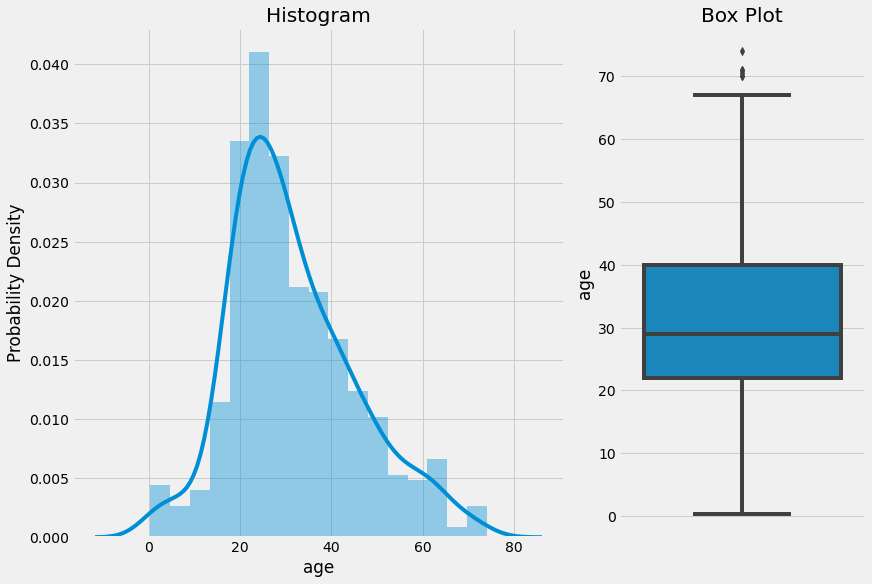

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
style.use('fivethirtyeight')

## Creating a customized chart. and giving in figsize and everything. 
fig = plt.figure(constrained_layout=True, figsize=(12,8))
## creating a grid of 3 cols and 3 rows. 
grid = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
#gs = fig3.add_gridspec(3, 3)

## Customizing the histogram grid. 
ax1 = fig.add_subplot(grid[:, :2])
## Set the title. 
ax1.set_title('Histogram')
plt.ylabel('Probability Density', axes=ax1)

## plot the histogram. 
sns.distplot(f_d_age, norm_hist=True, ax = ax1)

## Customizing the Box Plot. 
ax2 = fig.add_subplot(grid[:, 2])
## Set title. 
ax2.set_title('Box Plot')
## Plotting the box plot. 
sns.boxplot(f_d_age, orient='v', ax = ax2 );


plt.show()


In [15]:
raw_data=raw_data.drop(columns='surname') #不將surname放進之後分析

In [16]:
raw_data

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,7.2250,C


# 第三題

In [17]:
raw_data[raw_data.fare.isnull()==True] #查看 fare 缺失值

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


In [18]:
raw_data[~raw_data.fare.isnull()].fare.describe() #查看 fare 分布概況

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [19]:
fare_array=raw_data[~raw_data.fare.isnull()].fare.to_numpy() #將 fare 資料轉換成 np.array

In [20]:
shapiro(fare_array) # shapiro test

ShapiroResult(statistic=0.5278252363204956, pvalue=0.0)

In [21]:
# 其他 noraml test
k2, p = stats.normaltest(fare_array)
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.10509e-264
The null hypothesis can be rejected


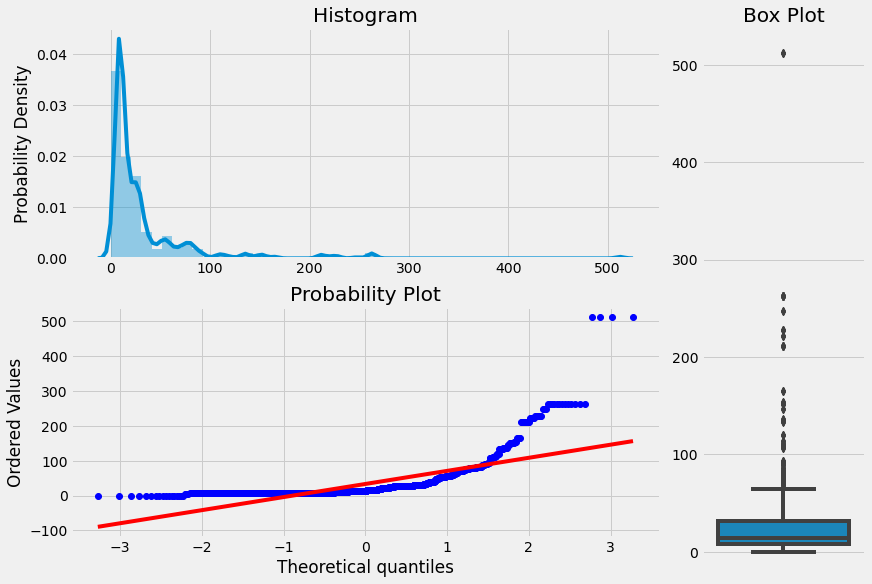

In [22]:
plotting_3_chart(fare_array)

## 第三題相關性分析需要進行資料前處理

In [23]:
raw_data['title']=raw_data['name'].map(lambda x:x.split(',')[1].split('.')[0].strip()) #將title從name中抽取出來
#查看title分布狀況
raw_data['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Sir               1
Dona              1
Capt              1
Don               1
Mme               1
Lady              1
Jonkheer          1
the Countess      1
Name: title, dtype: int64

In [24]:
# 將 title 性質類似者整併為一類，減少類別
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

raw_data['title']=raw_data['title'].map(TitleDict)
raw_data['title'].value_counts() #整併後的類別分布

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: title, dtype: int64

In [25]:
raw_data['embarked'].value_counts() 

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [26]:
raw_data['embarked']=raw_data['embarked'].fillna('S') #缺失值用 S 填充

In [27]:
raw_data['fare']=raw_data['fare'].fillna(raw_data['fare'].mean())  #缺失值用 mean 填充

In [28]:
raw_data['familyNum']=raw_data['parch']+raw_data['sibsp']+1 #familyNum 算法是算 parch + sibsp +1=父母+兄弟姊妹+自己

In [29]:
#familysize 定義不同的家庭大小
def familysize(familyNum):
    if familyNum==1:
        return 0
    elif (familyNum>=2)&(familyNum<=4):
        return 1
    else:
        return 2

raw_data['familySize']=raw_data['familyNum'].map(familysize)
raw_data['familySize'].value_counts()

0    790
1    437
2     82
Name: familySize, dtype: int64

In [30]:
raw_data

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title,familyNum,familySize
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,Miss,1,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,Master,4,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,Miss,4,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,Mr,4,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,Mrs,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,14.4542,C,Miss,2,1
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C,Miss,2,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,7.2250,C,Mr,1,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,7.2250,C,Mr,1,0


In [31]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
raw_data.sex=le.fit_transform(raw_data.sex) #進行 encdoing

In [32]:
le=preprocessing.LabelEncoder()
raw_data.embarked=le.fit_transform(raw_data.embarked)
le=preprocessing.LabelEncoder()
raw_data.title=le.fit_transform(raw_data.title.values.astype('str'))

In [33]:
raw_data #成功將三個類別變數 sex、embarked、title進行encoding

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title,familyNum,familySize
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,211.3375,2,1,1,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,151.5500,2,0,4,1
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,151.5500,2,1,4,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,151.5500,2,2,4,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,151.5500,2,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.5000,1,0,14.4542,0,1,2,1
1305,3,0,"Zabour, Miss. Thamine",0,NaN,1,0,14.4542,0,1,2,1
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.5000,0,0,7.2250,0,2,1,0
1307,3,0,"Zakarian, Mr. Ortin",1,27.0000,0,0,7.2250,0,2,1,0


In [34]:
final_data=pd.get_dummies(raw_data, columns=['embarked','title']) #one-hot(dummy) encoding

In [35]:
final_data

,pclass,survived,name,sex,age,sibsp,parch,fare,familyNum,familySize,embarked_0,embarked_1,embarked_2,title_0,title_1,title_2,title_3,title_4,title_5
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,211.3375,1,0,0,0,1,0,1,0,0,0,0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,151.5500,4,1,0,0,1,1,0,0,0,0,0
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,151.5500,4,1,0,0,1,0,1,0,0,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,151.5500,4,1,0,0,1,0,0,1,0,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,151.5500,4,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.5000,1,0,14.4542,2,1,1,0,0,0,1,0,0,0,0
1305,3,0,"Zabour, Miss. Thamine",0,NaN,1,0,14.4542,2,1,1,0,0,0,1,0,0,0,0
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.5000,0,0,7.2250,1,0,1,0,0,0,0,1,0,0,0
1307,3,0,"Zakarian, Mr. Ortin",1,27.0000,0,0,7.2250,1,0,1,0,0,0,0,1,0,0,0


In [36]:
final_data.columns.tolist() #現有變數列表

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'familyNum',
 'familySize',
 'embarked_0',
 'embarked_1',
 'embarked_2',
 'title_0',
 'title_1',
 'title_2',
 'title_3',
 'title_4',
 'title_5']

In [37]:
final_data=final_data.drop(columns=['name','embarked_2','title_5']) #embarked & title 經過 one-hot 需要少掉一個level

In [38]:
final_data.columns.tolist()

['pclass',
 'survived',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'familyNum',
 'familySize',
 'embarked_0',
 'embarked_1',
 'title_0',
 'title_1',
 'title_2',
 'title_3',
 'title_4']

In [39]:
# 重新命名encoding後的變數名稱
final_data.columns=['pclass',
 'survived',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'familyNum',
 'familySize',
 'embarked_C',
 'embarked_Q',
 'title_Master',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_Officier']

In [40]:
final_data.columns.tolist() #命名成功

['pclass',
 'survived',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'familyNum',
 'familySize',
 'embarked_C',
 'embarked_Q',
 'title_Master',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_Officier']

In [41]:
fare_data=final_data.drop(columns=['survived']) #分析 fare 相關性不將 survived 放入

In [42]:
farecor=pd.DataFrame()
farecor=fare_data.corr()
farecor['fare'].sort_values(ascending=False)

fare              1.000000
familySize        0.287672
embarked_C        0.286241
familyNum         0.226465
parch             0.221522
age               0.178229
sibsp             0.160224
title_Mrs         0.139235
title_Miss        0.092051
title_Officier    0.028696
title_Master      0.009191
embarked_Q       -0.130054
sex              -0.185484
title_Mr         -0.192192
pclass           -0.558477
Name: fare, dtype: float64

In [43]:
# heatmap呈現變數的排序方式 -> fare 放最上面
fare_col=['fare',
    'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'familyNum',
 'familySize',
 'embarked_C',
 'embarked_Q',
 'title_Master',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_Officier']

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 <a list of 15 Text major ticklabel objects>)

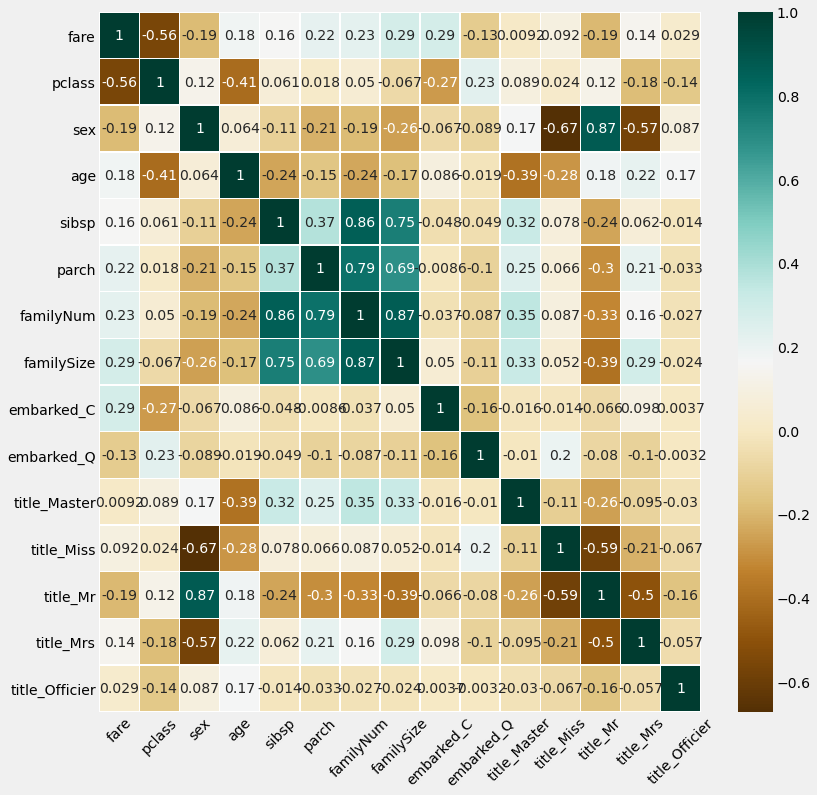

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(fare_data[fare_col].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

# 4&5 建模

In [45]:
# 分成 x&y
final_data_y=final_data.survived
final_data_x=final_data.drop(columns=['survived'])

In [46]:
final_data_x

,pclass,sex,age,sibsp,parch,fare,familyNum,familySize,embarked_C,embarked_Q,title_Master,title_Miss,title_Mr,title_Mrs,title_Officier
0,1,0,29.0000,0,0,211.3375,1,0,0,0,0,1,0,0,0
1,1,1,0.9167,1,2,151.5500,4,1,0,0,1,0,0,0,0
2,1,0,2.0000,1,2,151.5500,4,1,0,0,0,1,0,0,0
3,1,1,30.0000,1,2,151.5500,4,1,0,0,0,0,1,0,0
4,1,0,25.0000,1,2,151.5500,4,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,2,1,1,0,0,1,0,0,0
1305,3,0,NaN,1,0,14.4542,2,1,1,0,0,1,0,0,0
1306,3,1,26.5000,0,0,7.2250,1,0,1,0,0,0,1,0,0
1307,3,1,27.0000,0,0,7.2250,1,0,1,0,0,0,1,0,0


In [47]:
for col in final_data_x.columns:
    count=final_data_x[final_data_x[col].isnull()].shape[0]
    print(col,'nan_counts: ', count)

pclass nan_counts:  0
sex nan_counts:  0
age nan_counts:  263
sibsp nan_counts:  0
parch nan_counts:  0
fare nan_counts:  0
familyNum nan_counts:  0
familySize nan_counts:  0
embarked_C nan_counts:  0
embarked_Q nan_counts:  0
title_Master nan_counts:  0
title_Miss nan_counts:  0
title_Mr nan_counts:  0
title_Mrs nan_counts:  0
title_Officier nan_counts:  0


In [48]:
final_data_x

,pclass,sex,age,sibsp,parch,fare,familyNum,familySize,embarked_C,embarked_Q,title_Master,title_Miss,title_Mr,title_Mrs,title_Officier
0,1,0,29.0000,0,0,211.3375,1,0,0,0,0,1,0,0,0
1,1,1,0.9167,1,2,151.5500,4,1,0,0,1,0,0,0,0
2,1,0,2.0000,1,2,151.5500,4,1,0,0,0,1,0,0,0
3,1,1,30.0000,1,2,151.5500,4,1,0,0,0,0,1,0,0
4,1,0,25.0000,1,2,151.5500,4,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,2,1,1,0,0,1,0,0,0
1305,3,0,NaN,1,0,14.4542,2,1,1,0,0,1,0,0,0
1306,3,1,26.5000,0,0,7.2250,1,0,1,0,0,0,1,0,0
1307,3,1,27.0000,0,0,7.2250,1,0,1,0,0,0,1,0,0


In [49]:
final_data_x.age=final_data_x.age.fillna(final_data_x.age.mean()) #age 用 mean補缺失值

In [50]:
#再次檢查缺失值
for col in final_data_x.columns:
    count=final_data_x[final_data_x[col].isnull()].shape[0]
    print(col,'nan_counts: ', count)

pclass nan_counts:  0
sex nan_counts:  0
age nan_counts:  0
sibsp nan_counts:  0
parch nan_counts:  0
fare nan_counts:  0
familyNum nan_counts:  0
familySize nan_counts:  0
embarked_C nan_counts:  0
embarked_Q nan_counts:  0
title_Master nan_counts:  0
title_Miss nan_counts:  0
title_Mr nan_counts:  0
title_Mrs nan_counts:  0
title_Officier nan_counts:  0


In [51]:
# 我們的個資
pre=np.array([[2,1,22,1,2,60,4,1,0,1,0,0,1,0,0],
     [1,1,23,2,2,60,5,2,1,0,0,0,1,0,0],
     [3,1,23,3,2,60,6,2,0,0,0,0,1,0,0],
     [1,0,22,3,2,60,6,2,0,1,0,1,0,0,0]])

In [52]:
pre.shape

(4, 15)

In [53]:
# 資料進行轉換
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()

sc.fit(final_data_x)

x_train_nor=sc.transform(final_data_x)
x_test_nor=sc.transform(pre)

In [54]:
x_train_nor.shape

(1309, 15)

## LogisticRegression

In [55]:
X = sm.add_constant(x_train_nor)
lr1 = sm.Logit(final_data_y, X)
lr1_result = lr1.fit(maxiter=500,method='bfgs')
print(lr1_result.summary())

Optimization terminated successfully.
         Current function value: 0.437377
         Iterations: 74
         Function evaluations: 75
         Gradient evaluations: 75
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1294
Method:                           MLE   Df Model:                           14
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                  0.3423
Time:                        18:11:44   Log-Likelihood:                -572.53
converged:                       True   LL-Null:                       -870.51
Covariance Type:            nonrobust   LLR p-value:                3.828e-118
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6556      0.197     -

In [56]:
# 發現只有以p-value來看僅有變數 0,2,8顯著
X = sm.add_constant(x_train_nor[:,[0,2,8]])
lr2 = sm.Logit(final_data_y, X)
lr2_result = lr2.fit()
print(lr2_result.summary())

Optimization terminated successfully.
         Current function value: 0.593846
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1305
Method:                           MLE   Df Model:                            3
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                  0.1070
Time:                        18:11:44   Log-Likelihood:                -777.34
converged:                       True   LL-Null:                       -870.51
Covariance Type:            nonrobust   LLR p-value:                 3.775e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5365      0.062     -8.694      0.000      -0.657      -0.416
x1            -0.7807      0.

In [57]:
# sklearn fit 全部變數
from sklearn.linear_model  import LogisticRegression
lr3=LogisticRegression()
lr3.fit(x_train_nor,final_data_y)

LogisticRegression()

In [58]:
print(lr3.coef_)
print(lr3.intercept_ )

[[-0.77444962 -0.99151913 -0.34919199 -0.33300613 -0.07671821  0.11151806
  -0.26097037  0.07540837  0.22508679  0.03706799  0.35031213 -0.07229771
  -0.39356998  0.15484796 -0.05941379]]
[-0.67490908]


In [59]:
lr3.predict(x_test_nor)

array([0, 0, 0, 1], dtype=int64)

In [60]:
np.round(lr3.predict_proba(x_test_nor),3)

array([[0.869, 0.131],
       [0.716, 0.284],
       [0.978, 0.022],
       [0.294, 0.706]])

In [61]:
# sklearn fit 3個顯著變數
lr4=LogisticRegression()
lr4.fit(x_train_nor[:,[0,2,8]],final_data_y)

LogisticRegression()

In [62]:
print(lr4.coef_)

[[-0.77626456 -0.43472769  0.22512219]]


In [63]:
lr4.predict(x_test_nor[:,[0,2,8]])

array([0, 1, 0, 1], dtype=int64)

In [64]:
np.round(lr4.predict_proba(x_test_nor[:,[0,2,8]]),3)

array([[0.528, 0.472],
       [0.208, 0.792],
       [0.745, 0.255],
       [0.307, 0.693]])

## Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train_nor,final_data_y)


DecisionTreeClassifier(max_depth=5)

In [67]:
np.round(clf.predict_proba(x_test_nor),3)


array([[0.89 , 0.11 ],
       [0.616, 0.384],
       [0.89 , 0.11 ],
       [0.013, 0.987]])

In [74]:
import pylab

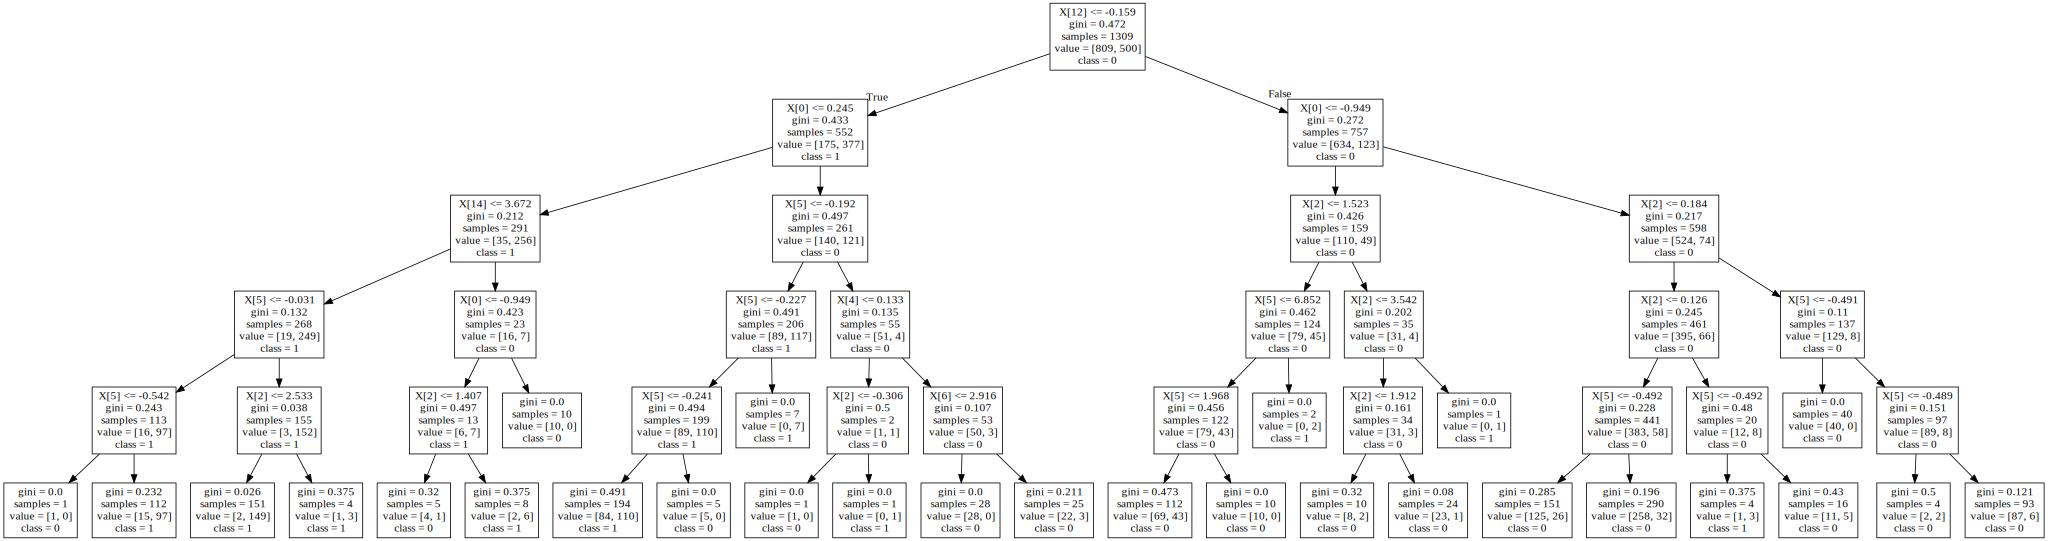

In [78]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf, class_names=['0', '1'], out_file=None)
graph = graphviz.Source(dot_data)
# s = Source(temp, filename="test.gv", format="png")
# s.view()
graph